# Occupancy Detection using various Machine Learning Techniques

### Occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models
---
**Attribute Information**
- date time year-month-day hour:minute:second
- Temperature, in Celsius
- Relative Humidity, %
- Light, in Lux
- CO2, in ppm
- Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
- Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data from 3  csv
As the data is divided into 3 parts, train and 2 test datasets, we will read all the datasets and perform EDA all together and adjust Nan values or any noise in the dataset. Then we will divide the dataset into required parts and then use the dataset for predicting on various models

In [2]:
df_test1 = pd.read_csv('datatest.txt')
df_test2 = pd.read_csv('datatest2.txt')
df_train = pd.read_csv('datatraining.txt')

In [3]:
df_test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy.

- Temperature in Celsius.
- Relative humidity as a percentage.
- Light measured in lux.
- Carbon dioxide measured in parts per million.
-  Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
- Occupancy as either 1 for occupied or 0 for not occupied.

In [4]:
df=pd.concat([df_test1,df_test2,df_train]).reset_index(drop=True)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date'][0]

Timestamp('2015-02-02 14:19:00')

Since the values of Light and CO2 have a mean of above 100 while the values of Humidity ratio, Occupancy is very less like in range of 10^-2 and 10^-1, the data should be normalized

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
df[columns]=scaler.fit_transform(np.array(df[columns]))

In [10]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,0.869029,0.418677,0.344793,0.202224,0.549737,1
1,2015-02-02 14:19:59,0.872357,0.419468,0.340787,0.208956,0.551972,1
2,2015-02-02 14:21:00,0.874576,0.416831,0.337409,0.214525,0.549997,1
3,2015-02-02 14:22:00,0.873190,0.412217,0.290912,0.217581,0.544374,1
4,2015-02-02 14:23:00,0.879014,0.415513,0.287877,0.220135,0.550376,1


In [11]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,0.352458,0.479496,0.077040,0.166974,0.408794,0.231031
std,0.195127,0.218948,0.123983,0.187048,0.201971,0.421503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221880,0.340804,0.000000,0.028400,0.274836,0.000000
50%,0.314330,0.463415,0.000000,0.091761,0.425517,0.000000
75%,0.466872,0.639200,0.177346,0.235562,0.567518,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the Distribution of Labels for prediction so how balanced or imbalanced dataset it is

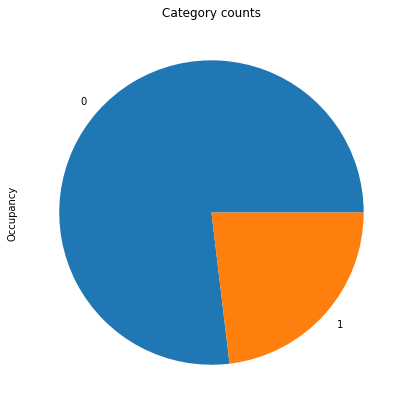

In [12]:
plt.figure(figsize=(7,7))
df['Occupancy'].value_counts().plot(kind='pie');
plt.title('Category counts');

So we can see there are more samples of class 0 that the room occupance is null, 

To tackle this, we can do is **Undersampling** i.e. randomly selecting some samples from the class 0 and balancing the dataset, while another approach is **Oversampling** where we create copies of the minority class to equate it to the class that dominates.
Alternatively we can use Ensemble techniques to overcome this phenomenon

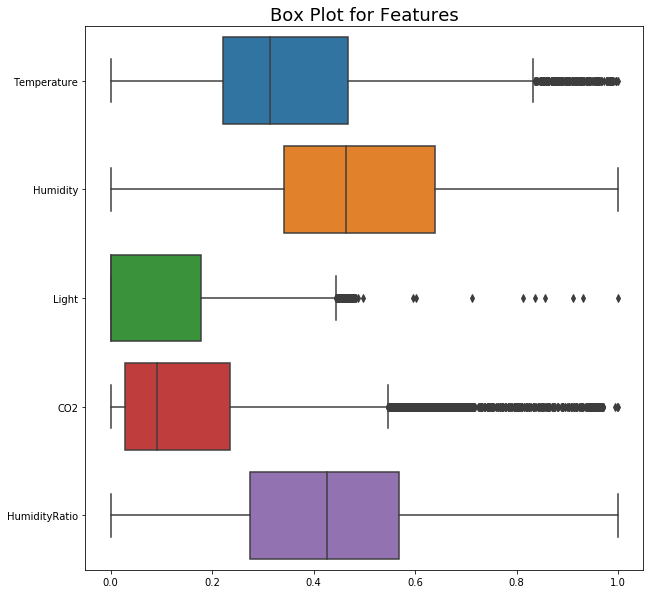

In [13]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df.drop(['date', 'Occupancy'],axis=1), orient="h")

The Box plots show how the data of each columns is varied in between 0 and 1.
Also we can infer that there are many outliers in Co2 towards 0.6 and 1 while there are some in Light and Temperature. The data of Humidity and Humidity ratio is very equally distributed.

Now we will see the correlation of the values

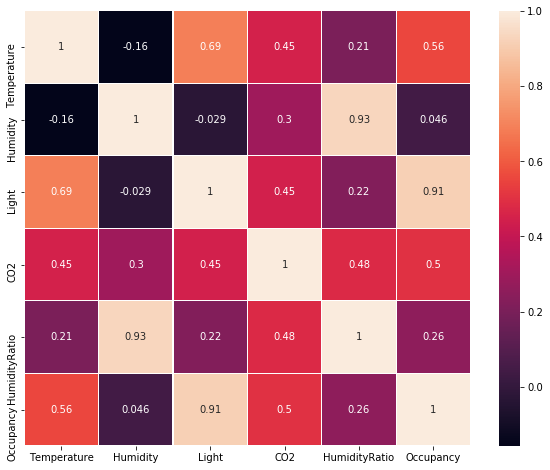

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

From this we can see that the correlation between the variable that we will use to predict that is Occupancy and other variables can be considered. 

### **Here correlation between Temperature, Light and Co2 can be seen prominent**


As obvious if there is enough light, if the temperature is well enough and Co2 level is low  or we can say room is more ventilated, there would be high chances of occupancy and there may be the highly deciding factors for the data

Also this reminds of another alternative that how can we think of time of day and the room occupancy
As we have the timestamps, we can divide the data into different slots like Morning, Evening, Night etc.

In [15]:
occupacy = []
non_occupacy = []
for date in df[df['Occupancy'] == 1]['date']:
    occupacy.append(date.hour)
for date in df[df['Occupancy'] == 0]['date']:
    non_occupacy.append(date.hour)

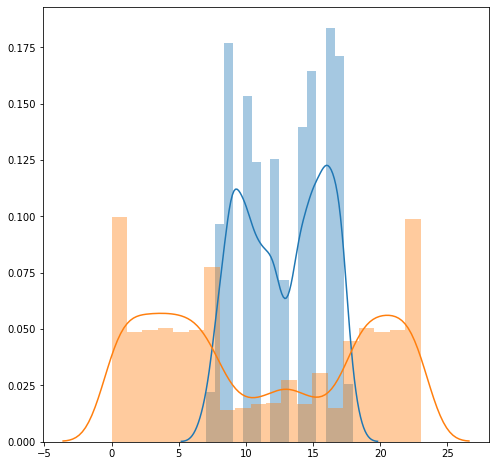

In [16]:
plt.figure(figsize=(8,8))
ax = sns.distplot(occupacy)
ax = sns.distplot(non_occupacy)

In [17]:
min(occupacy)

7

In [18]:
max(occupacy)

18

So occupancy is there only when the time of the day is between 7 and 18 that majorly denotes the working hours

In [19]:
df['work']=df['date'].apply(lambda x: 1 if(x.hour>7 and x.hour<18) else 0)

In [20]:
df[['work','Occupancy']].corr()

,work,Occupancy
work,1.000000,0.653711
Occupancy,0.653711,1.000000


So there is a correlation of 0.63 if the work hours are on. It cannot be considered highly correlated but definitely data parameter could be used this way to help us predict the occupancy

In [21]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'work'],
      dtype='object')

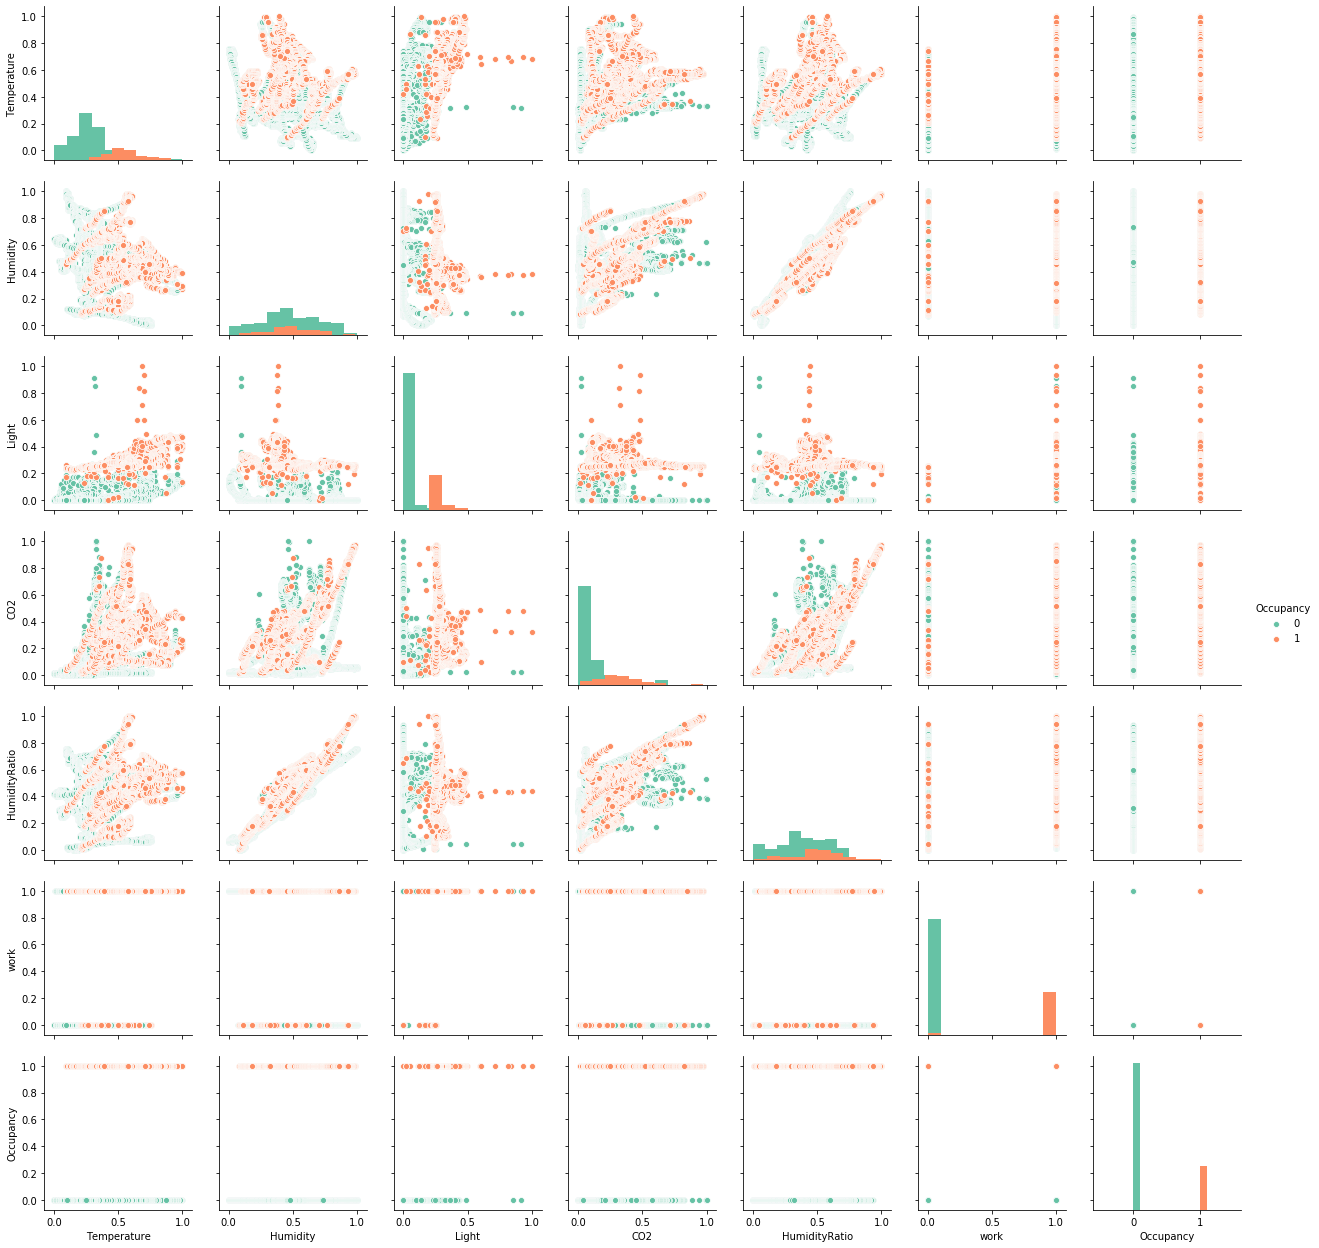

In [22]:
sns.pairplot(df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','work','Occupancy']],hue='Occupancy' ,diag_kind = "hist",palette='Set2')

## Split Data into train test

In [22]:
X =  df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'work']]
y = df['Occupancy']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ROC , AUC curve Function definition

To plot the ROC curve and get the Area under the curve, we will create a function to plot the curve and also get the AUC directly. This can be done using the auc and roc_curve functions of sklearn

In [24]:
# Function to get ROC curve and AUC 
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test,y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train) 

LogisticRegression()

In [26]:
logistic_preds = logmodel.predict(X_test)

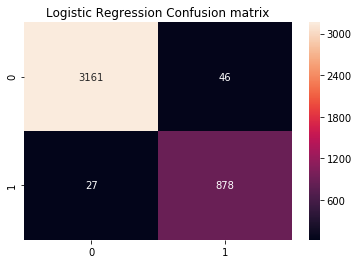

In [27]:
from sklearn.metrics import confusion_matrix
plt.title("Logistic Regression Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, logistic_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3207
           1       0.95      0.97      0.96       905

    accuracy                           0.98      4112
   macro avg       0.97      0.98      0.97      4112
weighted avg       0.98      0.98      0.98      4112



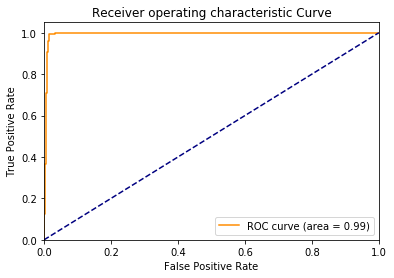

In [29]:
plot_roc(y_test,logmodel.predict_proba(X_test)[:,1])

0.9611138466345941


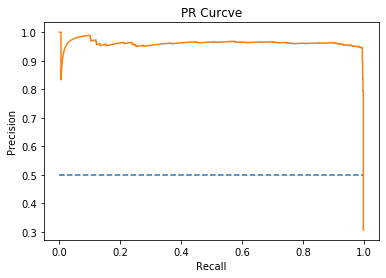

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = logmodel.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
dt_preds = dt_classifier.predict(X_test)

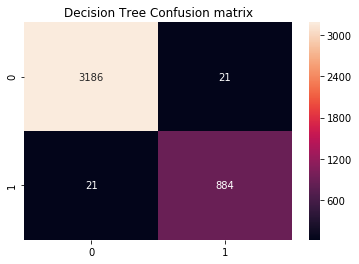

In [33]:
from sklearn.metrics import confusion_matrix
plt.title("Decision Tree Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3207
           1       0.98      0.98      0.98       905

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



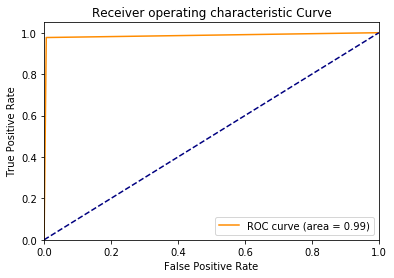

In [35]:
plot_roc(y_test,dt_preds)

0.9793490820560226


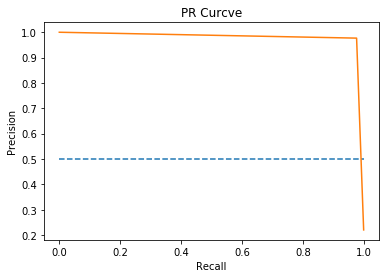

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = dt_classifier.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

### Decision Tree Visualization of all the branches

<!--
import numpy as np
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dt_classifier,
                feature_names=list(X_train.columns.values),
                out_file="ai_occupancy.dot",
                class_names=['Non Occupancy', 'Occupancy'],
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all")
with open("ai_occupancy.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graph=graphviz.Source(bamboo_tree_graph)
graph.format = 'png'
graph.render('dtree_render',view=True)-->
![Decision Tree Visualization](dtree_render.png)

# SVM

In [37]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [38]:
svm_preds=svm_model.predict(X_test)

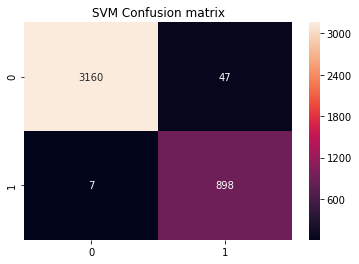

In [39]:
from sklearn.metrics import confusion_matrix
plt.title("SVM Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [40]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3207
           1       0.95      0.99      0.97       905

    accuracy                           0.99      4112
   macro avg       0.97      0.99      0.98      4112
weighted avg       0.99      0.99      0.99      4112



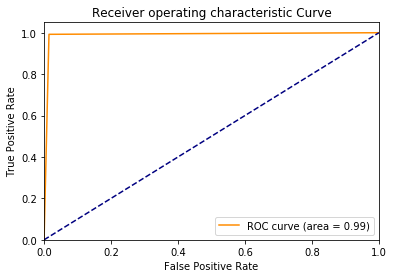

In [41]:
plot_roc(y_test,svm_preds)

0.972116039132533


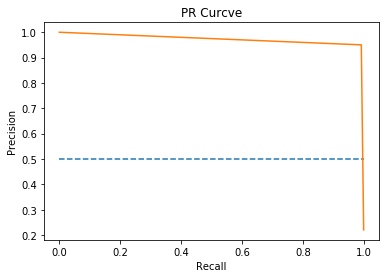

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = svm_model.predict(X_test)

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rf_preds = classifier.predict(X_test)

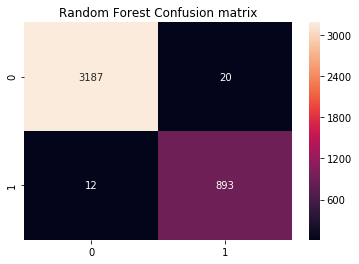

In [45]:
from sklearn.metrics import confusion_matrix
plt.title("Random Forest Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [46]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3207
           1       0.98      0.99      0.98       905

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



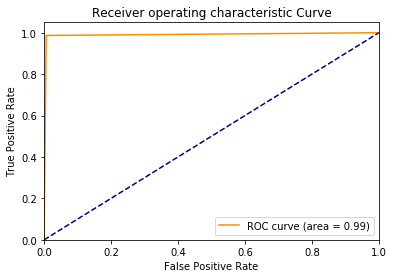

In [47]:
plot_roc(y_test,rf_preds)

0.9962648029939696


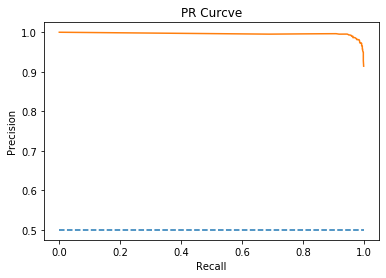

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = classifier.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=100)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [50]:
knn_preds = modelKNN.predict(X_test)

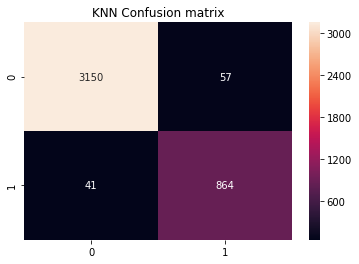

In [51]:
from sklearn.metrics import confusion_matrix
plt.title("KNN Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt="d")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

In [52]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3207
           1       0.94      0.95      0.95       905

    accuracy                           0.98      4112
   macro avg       0.96      0.97      0.97      4112
weighted avg       0.98      0.98      0.98      4112



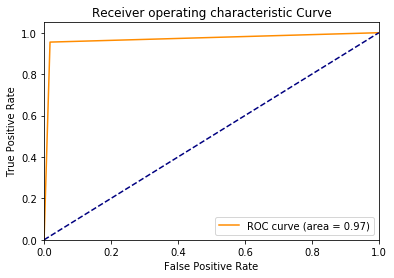

In [53]:
plot_roc(y_test,knn_preds)

0.9872143088735028


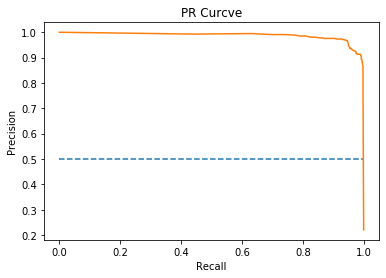

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = modelKNN.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curcve')
plt.plot(recall,precision)

# Results

In [55]:
print("Report")
print("--------------------------------------------------")
print("Logistic Regression")
print(classification_report(y_test, logistic_preds))
print("--------------------------------------------------")
print("Decision Tree")
print(classification_report(y_test, dt_preds))
print("--------------------------------------------------")
print("SVM")
print(classification_report(y_test, svm_preds))
print("--------------------------------------------------")
print("Random Forest")
print(classification_report(y_test, rf_preds))
print("--------------------------------------------------")
print("KNN")
print(classification_report(y_test, knn_preds))
print("--------------------------------------------------")

Report
--------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3207
           1       0.95      0.97      0.96       905

    accuracy                           0.98      4112
   macro avg       0.97      0.98      0.97      4112
weighted avg       0.98      0.98      0.98      4112

--------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3207
           1       0.98      0.98      0.98       905

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112

--------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3207
           1       0.95      0.99      

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracies")
print("--------------------------------------------------")
print("Logistic Regression")
print(accuracy_score(y_test, logistic_preds))
print("--------------------------------------------------")
print("Decision Tree")
print(accuracy_score(y_test, dt_preds))
print("--------------------------------------------------")
print("SVM")
print(accuracy_score(y_test, svm_preds))
print("--------------------------------------------------")
print("Random Forest")
print(accuracy_score(y_test, rf_preds))
print("--------------------------------------------------")
print("KNN")
print(accuracy_score(y_test, knn_preds))
print("--------------------------------------------------")

Accuracies
--------------------------------------------------
Logistic Regression
0.9822470817120622
--------------------------------------------------
Decision Tree
0.9897859922178989
--------------------------------------------------
SVM
0.9868677042801557
--------------------------------------------------
Random Forest
0.9922178988326849
--------------------------------------------------
KNN
0.9761673151750972
--------------------------------------------------


From all the results and the plots, we can conclude that the **Random Forest Classifier** works the best as the AUC score of it is the highest and as the dataset is highly imbalanced, we can know more about the quality of classifier from the PR and ROC curves instead of classification report.